# **Business Running Case: Evaluating Personal Job Market Prospects in 2024**
**Project Phase III**

In [58]:
import pandas as pd
import numpy as np

In [59]:
df = pd.read_csv("lightcast_job_postings.csv")

/tmp/ipykernel_8406/3047231268.py:1: DtypeWarning: Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("lightcast_job_postings.csv")


In [60]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)
# df.head()

In [61]:
#df.columns.tolist()

**Creating a Skill Level DataFrame**

In [62]:
import pandas as pd

skills_data = {
    "Name": ["Andrey", "Moiz", "Jason", "Prabu","Jitvan"],
    "Python (Programming Language)": [5, 3, 4, 3, 2],
    "SQL (Programming Language)": [4, 2, 5, 3, 5],
    "Microsoft Excel": [3, 1, 4, 3, 4],
    "Power BI": [2, 2, 3, 4, 5],
    "Tableau": [3, 4, 3, 4, 3]
}

df_skills = pd.DataFrame(skills_data)
df_skills.set_index("Name", inplace=True)
df_skills

,Python (Programming Language),SQL (Programming Language),Microsoft Excel,Power BI,Tableau
Name,,,,,
Andrey,5,4,3,2,3
Moiz,3,2,1,2,4
Jason,4,5,4,3,3
Prabu,3,3,3,4,4
Jitvan,2,5,4,5,3


**Visualizing Skill Gaps with Seaborn**

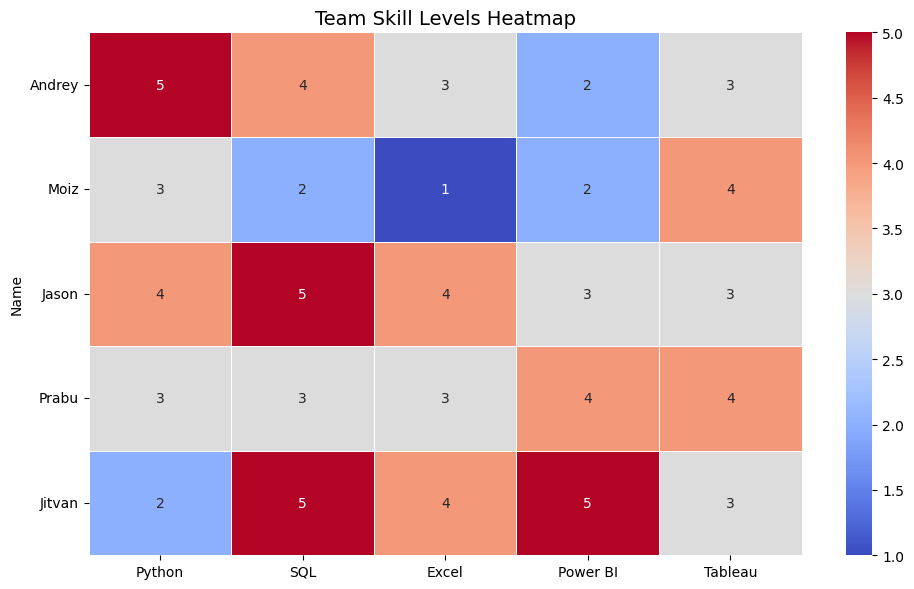

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a mapping dictionary for display labels only
column_display_names = {
    "Python (Programming Language)": "Python",
    "SQL (Programming Language)": "SQL",
    "Microsoft Excel": "Excel",
    "Power BI": "Power BI",
    "Tableau": "Tableau"
}

plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    df_skills,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='white',
    cbar=True,
    fmt='g'
)

# Set cleaned display names just for x-axis
ax.set_xticklabels([column_display_names.get(label, label) for label in df_skills.columns],
                   rotation=0, ha='center', fontsize=10)

plt.title("Team Skill Levels Heatmap", fontsize=14)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

**Compare team skills to industry requirements**

**SOFTWARE SKILLS**

In [64]:
import pandas as pd
import ast                                     
from collections import Counter
import matplotlib.pyplot as plt

# Define the relevant skill columns
skill_columns = ["SOFTWARE_SKILLS_NAME"]

# Function to safely parse stringified lists
def extract_skills(row):
    skills = []
    for col in skill_columns:
        if pd.notna(row.get(col)):
            try:
                skills += ast.literal_eval(row[col])
            except Exception:
                continue
    return skills

# Apply function across rows
all_skills = df.apply(extract_skills, axis=1).explode().dropna()

# Count frequency of each skill
top_skills = Counter(all_skills).most_common(5)
top_skills_df = pd.DataFrame(top_skills, columns=["Skill", "Frequency"])

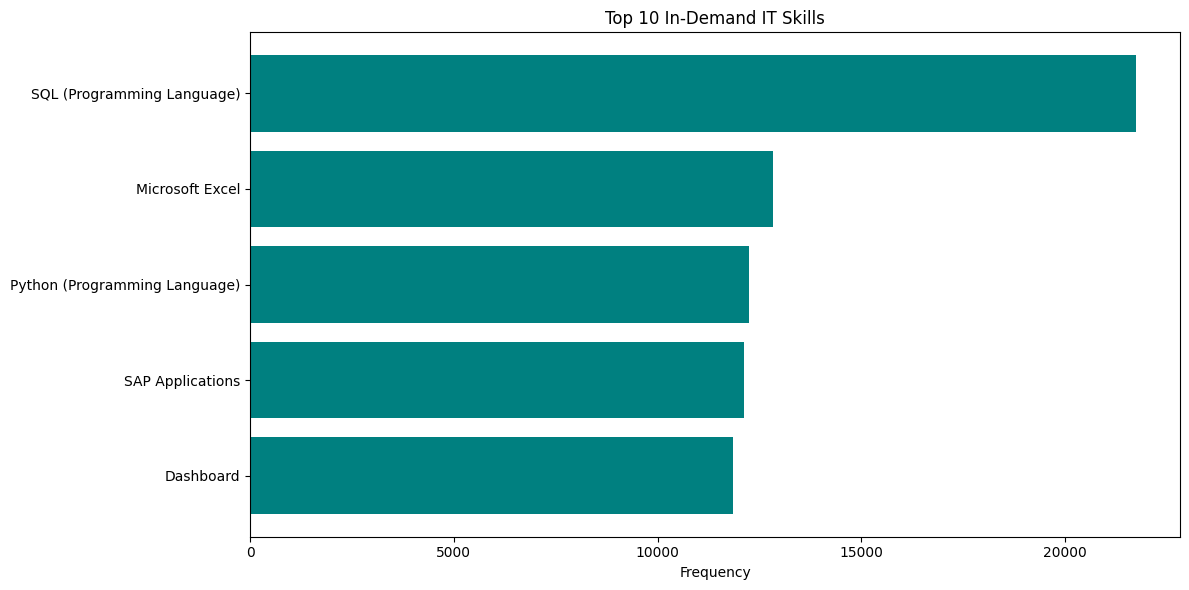

In [65]:
# Save to CSV
top_skills_df.to_csv("top_skills.csv", index=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_skills_df["Skill"], top_skills_df["Frequency"], color='teal')
plt.xlabel("Frequency")
plt.title("Top 10 In-Demand IT Skills")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

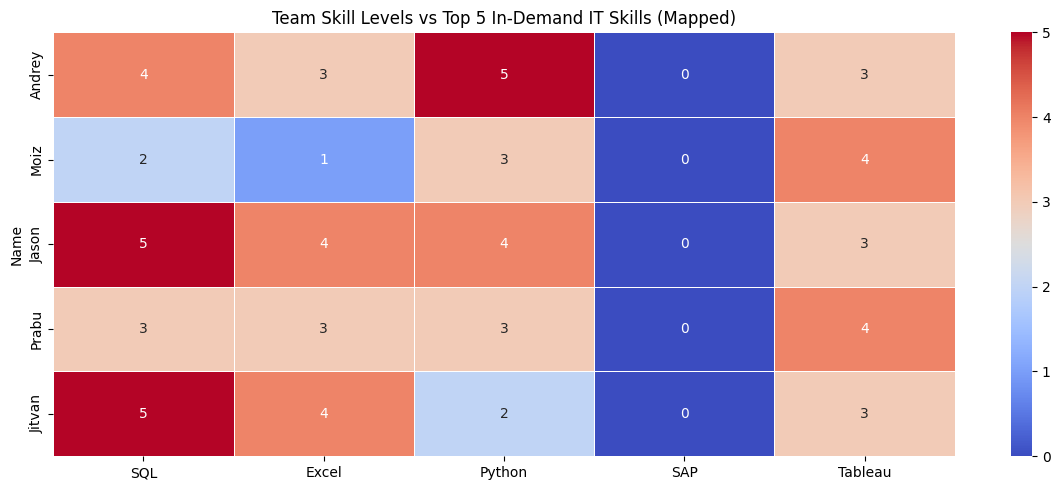

In [72]:
# Step 1: Load the top skills list
top_skill_names = top_skills_df["Skill"].tolist()

# Step 2: Manually map top skills to df_skills columns
skill_alias = {
    "SQL (Programming Language)": "SQL (Programming Language)",
    "Python (Programming Language)": "Python (Programming Language)",
    "Microsoft Excel": "Microsoft Excel",
    "Power BI": "Power BI",
    "Tableau (Business Intelligence Software)": "Tableau", 
    "Dashboard": "Tableau",  
    "SAP Applications": "SAP Applications" 
}

# Step 3: Map all top skills (no filtering yet)
mapped_top_skills = [skill_alias.get(skill, skill) for skill in top_skill_names]

# Step 4: Ensure all mapped columns exist in df_skills
for skill in mapped_top_skills:
    if skill not in df_skills.columns:
        df_skills[skill] = 0  

# Step 5: Now align after adding all
df_skills_aligned = df_skills[mapped_top_skills]


# Step 5: Align df_skills with the mapped top skills
df_skills_aligned = df_skills[mapped_top_skills]

# Shorten long x-axis tick labels
shortened_labels = {
    "SQL (Programming Language)": "SQL",
    "Python (Programming Language)": "Python",
    "Microsoft Excel": "Excel",
    "SAP Applications": "SAP",
    "Tableau": "Tableau"
}
df_skills_aligned = df_skills_aligned.rename(columns=shortened_labels)


plt.figure(figsize=(12, 5))
sns.heatmap(df_skills_aligned, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Team Skill Levels vs Top 5 In-Demand IT Skills (Mapped)")
plt.xticks(rotation=0, ha='center') 
plt.tight_layout()
plt.show()

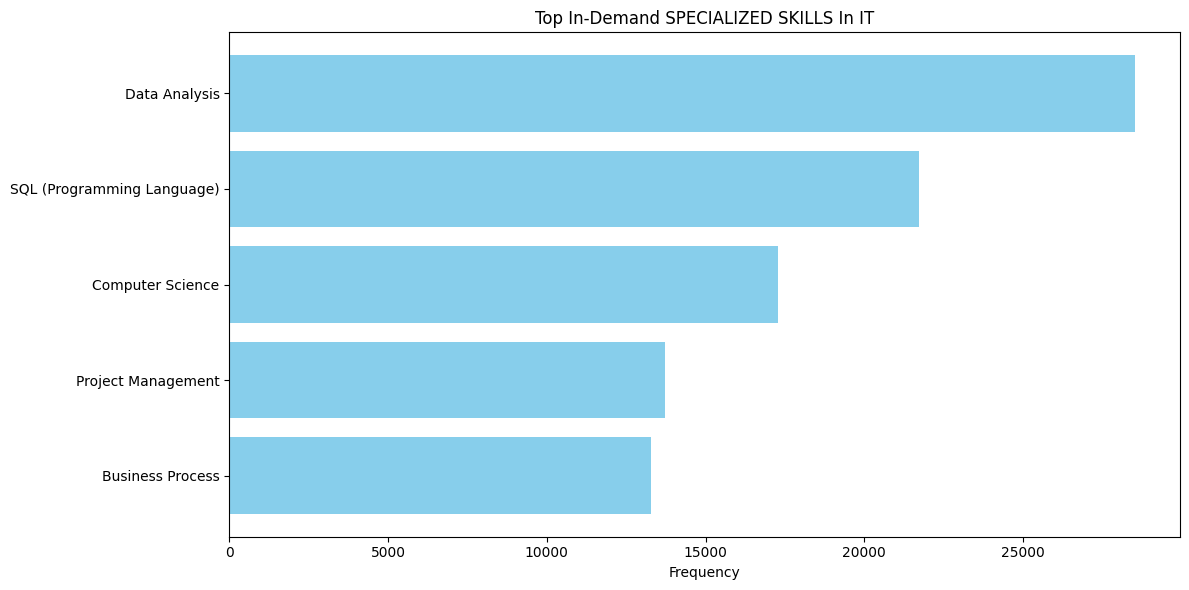

In [75]:
# Define the relevant skill columns
skill_columns = ["SPECIALIZED_SKILLS_NAME"]

# Function to safely parse stringified lists
def extract_skills(row):
    skills = []
    for col in skill_columns:
        if pd.notna(row.get(col)):
            try:
                skills += ast.literal_eval(row[col])
            except Exception:
                continue
    return skills

# Apply function across rows
all_skills = df.apply(extract_skills, axis=1).explode().dropna()

# Count frequency of each skill
top_skills = Counter(all_skills).most_common(5)
top_skills_df = pd.DataFrame(top_skills, columns=["Skill", "Frequency"])

# Optional: Save to CSV
top_skills_df.to_csv("top_skills.csv", index=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_skills_df["Skill"], top_skills_df["Frequency"], color='skyblue')
plt.xlabel("Frequency")
plt.title("Top In-Demand SPECIALIZED SKILLS In IT")
plt.gca().invert_yaxis()  # Most frequent at the top
plt.tight_layout()
plt.show()

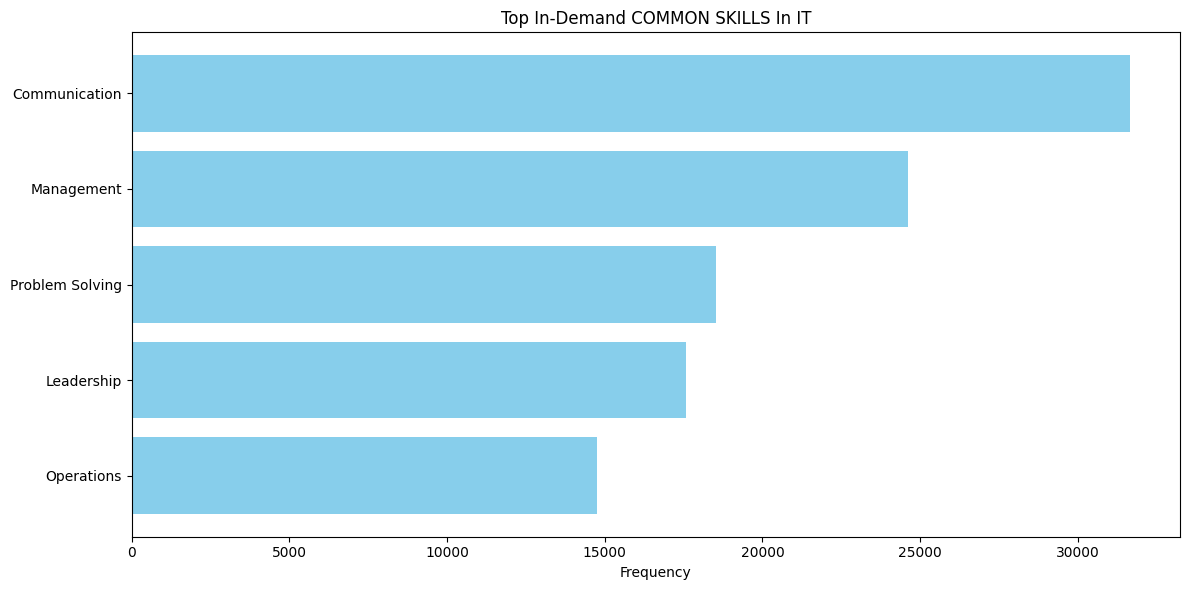

In [77]:
# Define the relevant skill columns
skill_columns = ["COMMON_SKILLS_NAME"]

# Function to safely parse stringified lists
def extract_skills(row):
    skills = []
    for col in skill_columns:
        if pd.notna(row.get(col)):
            try:
                skills += ast.literal_eval(row[col])
            except Exception:
                continue
    return skills

# Apply function across rows
all_skills = df.apply(extract_skills, axis=1).explode().dropna()

# Count frequency of each skill
top_skills = Counter(all_skills).most_common(5)
top_skills_df = pd.DataFrame(top_skills, columns=["Skill", "Frequency"])

# Optional: Save to CSV
top_skills_df.to_csv("top_skills.csv", index=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_skills_df["Skill"], top_skills_df["Frequency"], color='skyblue')
plt.xlabel("Frequency")
plt.title("Top In-Demand COMMON SKILLS In IT")
plt.gca().invert_yaxis()  # Most frequent at the top
plt.tight_layout()
plt.show()

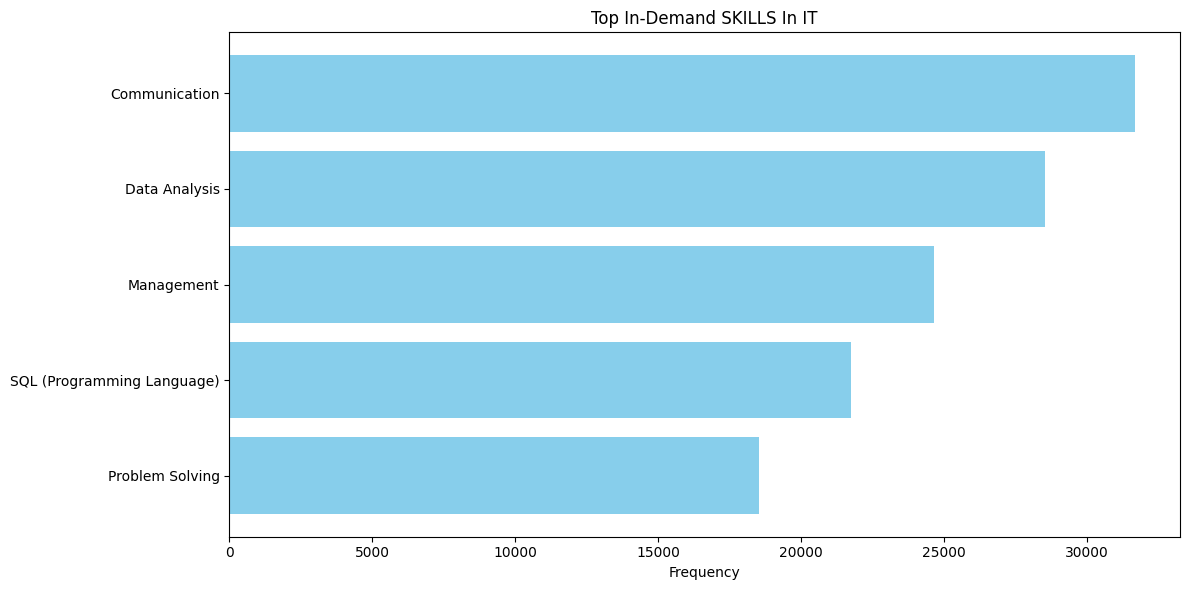

In [79]:
# Define the relevant skill columns
skill_columns = ["SKILLS_NAME"]

# Function to safely parse stringified lists
def extract_skills(row):
    skills = []
    for col in skill_columns:
        if pd.notna(row.get(col)):
            try:
                skills += ast.literal_eval(row[col])
            except Exception:
                continue
    return skills

# Apply function across rows
all_skills = df.apply(extract_skills, axis=1).explode().dropna()

# Count frequency of each skill
top_skills = Counter(all_skills).most_common(5)
top_skills_df = pd.DataFrame(top_skills, columns=["Skill", "Frequency"])

# Optional: Save to CSV
top_skills_df.to_csv("top_skills.csv", index=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_skills_df["Skill"], top_skills_df["Frequency"], color='skyblue')
plt.xlabel("Frequency")
plt.title("Top In-Demand SKILLS In IT")
plt.gca().invert_yaxis()  # Most frequent at the top
plt.tight_layout()
plt.show()